In [4]:
using DrWatson
@quickactivate "Doran_etal_2022"
researchdir() = joinpath(projectdir(), "_research")

using Phylo
using NewickTreeTools
using Muon, CSV, DataFrames
using StatsPlots

In [12]:
uniprot = readh5ad(joinpath(datadir(), "exp_pro", "UP7047", "2022-02-22_UP7047.h5ad"))
rowmeta = uniprot.obs[!, :]
close(uniprot.file)
spitree_phylo = open(parsenewick, joinpath(researchdir(), "runSPIonUP7047rows", "2022-02-22_UP7047-tree.nw"))
spitree_newick = readnw(read(joinpath(researchdir(), "runSPIonUP7047rows", "2022-02-22_UP7047-tree.nw"), String));
as_polytomy!(spitree_newick, fun=n->NewickTree.support(n)<0.5)
as_polytomy!(spitree_newick, fun=n->NewickTree.distance(n)<1e-8)

In [67]:
#  "UP000056419"  "Bacteroides stercoris" (+4)
#  "UP000003089"  "Bacteroides nordii" (+2)
#  "UP000095409"  "Blautia obeum"
#  "UP000000625"  "Escherichia coli" (+6)
#  "UP000029079"  "Weissella ceti" (+7)
startingleafid = "UP000056419"

"UP000056419"

In [142]:
leaves = NewickTree.getleaves(spitree_newick);
# leaves = NewickTree.getleaves(alttree);

In [143]:
leaf = leaves[name.(leaves) .== startingleafid][1]
lp = parent(leaf)
for i in 1:3
    lp = parent(lp)
end
leafparent = lp;
# subtree = collectiveLCA(spitree, blautiaIDs);
plotting_subtree = parsenewick(nwstr(leafparent))
sort!(plotting_subtree, rev=true)
plotIDS = getnodename.(plotting_subtree, Phylo.getleaves(plotting_subtree));
newnames = rowmeta[indexin(plotIDS,rowmeta.proteomeID), :Species];

In [144]:
plotIDS

16-element Vector{String}:
 "UP000018018"
 "UP000018068"
 "UP000018372"
 "UP000018098"
 "UP000017916"
 "UP000018121"
 "UP000195527"
 "UP000018392"
 "UP000279562"
 "UP000008630"
 "UP000319088"
 "UP000056419"
 "UP000262405"
 "UP000018228"
 "UP000018150"
 "UP000018063"

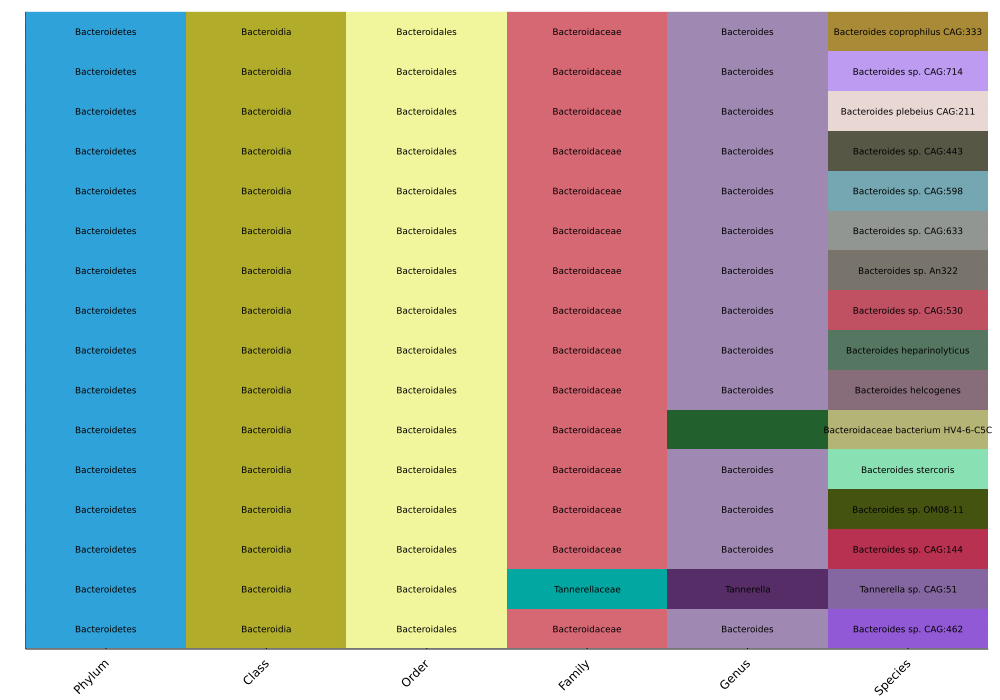

In [85]:
subtreemeta = rowmeta[reverse(indexin(plotIDS, rowmeta.proteomeID)), [:Phylum, :Class, :Order, :Family, :Genus, :Species]]
plot(size=(1000,700), yticks=(1:size(subtreemeta,1),""), xticks=(1:size(subtreemeta,2), names(subtreemeta)), xrotation=45)
heatmap!(Matrix(subtreemeta), colorbar=false, c=:glasbey_hv_n256)
ys = vcat([repeat([i], size(subtreemeta,2))' for i in 1:size(subtreemeta, 1)]...)
xs = hcat([repeat([i], size(subtreemeta,1)) for i in 1:size(subtreemeta, 2)]...);
annotate!(xs[:], ys[:], text.(Matrix(subtreemeta)[:], 6))

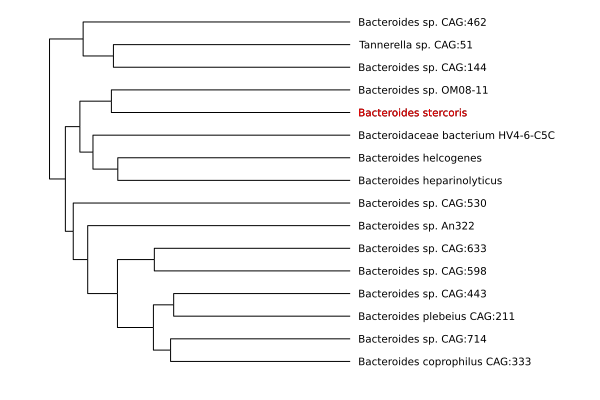

In [86]:
hcat(plotIDS,newnames);
plot(plotting_subtree, treetype=:dendrogram, size = (600, 400), showtips=false, rightmargin=50Plots.Measures.mm)
annotate!(ones(length(plotIDS))*1.7, 1:length(plotIDS), text.(newnames, :black, :left, 7),)
annotate!(1.7, 12, text.(newnames[12], :red, :left, 7),) # bacteriodes
# annotate!(1.7, 18, text.(newnames[18], :red, :left, 7),) # blautia
# annotate!(.95, 1, text.(newnames[1], :red, :left, 7),) # weissella
# annotate!(2.5, 1, text.(newnames[1], :red, :left, 7),) # ecoli
# annotate!(2.7, 8, text.(newnames[8], :red, :left, 7),) # bacteriodes nordii

In [133]:
# alttree = readnw(read(joinpath(researchdir(), "UP7047altdists", "UP7047_ogg_euclidean-supporttree.nw"), String));
# alttree = readnw(read(joinpath(researchdir(), "UP7047altdists", "UP7047_ogg_cityblock-tree.nw"), String));
# alttree = readnw(read(joinpath(researchdir(), "UP7047altdists", "UP7047_svd_euclidean-tree.nw"), String));
alttree = readnw(read(joinpath(researchdir(), "UP7047altdists", "UP7047_svd_cityblock-supporttree.nw"), String));
# as_polytomy!(alttree, fun=n->NewickTree.support(n)<0.5)
# as_polytomy!(alttree, fun=n->NewickTree.distance(n)<1e-8)
leaves = NewickTree.getleaves(alttree);

In [134]:
leaf = leaves[name.(leaves) .== "UP000056419"][1]
lp = parent(leaf)
for i in 1:3
    lp = parent(lp)
end
leafparent = lp;
# subtree = collectiveLCA(spitree, blautiaIDs);
plotting_subtree = parsenewick(nwstr(leafparent))
sort!(plotting_subtree, rev=true)
plotIDS = getnodename.(plotting_subtree, Phylo.getleaves(plotting_subtree));
newnames = rowmeta[indexin(plotIDS,rowmeta.proteomeID), :Species];
subtreemeta = rowmeta[reverse(indexin(plotIDS, rowmeta.proteomeID)), [:Phylum, :Class, :Order, :Family, :Genus, :Species]]

19×6 DataFrame
 Row │ Phylum         Class        Order          Family            Genus      ⋯
     │ String         String       String         String            String     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteroidetes  Bacteroidia  Bacteroidales  Tannerellaceae    Parabacter ⋯
   2 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Bacteroide
   3 │ Bacteroidetes  Bacteroidia  Bacteroidales  Odoribacteraceae  Odoribacte
   4 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae     Acetobacte
   5 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae     Alistipes  ⋯
   6 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Bacteroide
   7 │ Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae     Alistipes
   8 │ Bacteroidetes  Bacteroidia  Bacteroidales  Odoribacteraceae  Odoribacte
  ⋮  │       ⋮             ⋮             ⋮               ⋮                 ⋮   ⋱
  13 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Bacteroide ⋯
  14 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Mediterran
  15 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Bacteroide
  16 │ Bacteroidetes  Bacteroidia  Bacteroidales  Tannerellaceae    Parabacter
  17 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Bacteroide ⋯
  18 │ Bacteroidetes  Bacteroidia  Bacteroidales  Bacteroidaceae    Bacteroide
  19 │ Bacteroidetes  Bacteroidia  Bacteroidales  Tannerellaceae    Parabacter
                                                    2 columns and 4 rows omitted

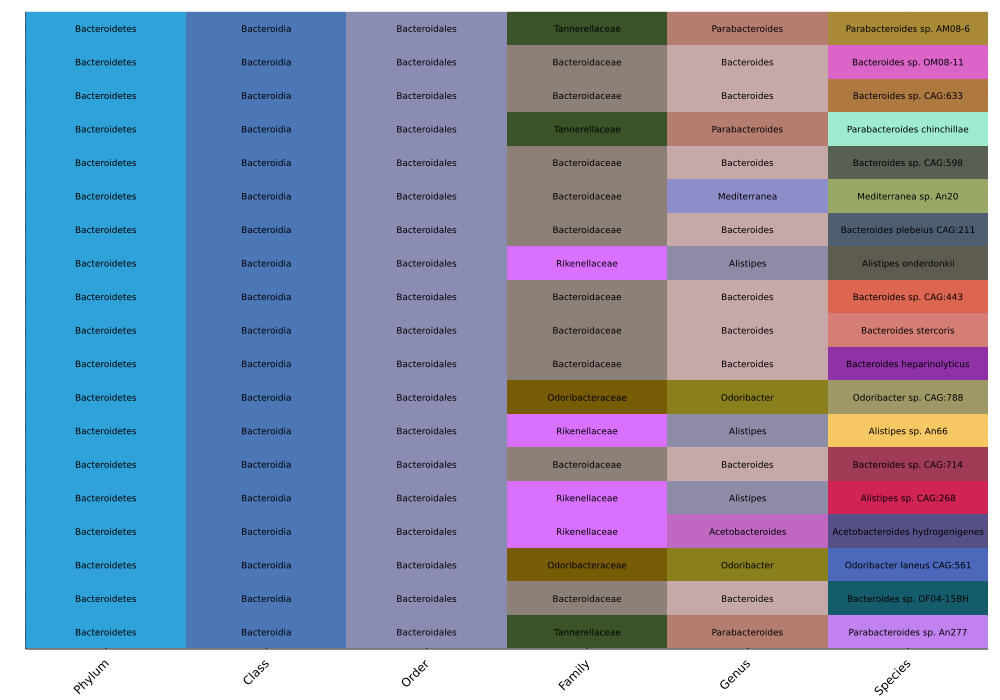

In [135]:
subtreemeta = rowmeta[reverse(indexin(plotIDS, rowmeta.proteomeID)), [:Phylum, :Class, :Order, :Family, :Genus, :Species]]
plot(size=(1000,700), yticks=(1:size(subtreemeta,1),""), xticks=(1:size(subtreemeta,2), names(subtreemeta)), xrotation=45)
heatmap!(Matrix(subtreemeta), colorbar=false, c=:glasbey_hv_n256)
ys = vcat([repeat([i], size(subtreemeta,2))' for i in 1:size(subtreemeta, 1)]...)
xs = hcat([repeat([i], size(subtreemeta,1)) for i in 1:size(subtreemeta, 2)]...);
annotate!(xs[:], ys[:], text.(Matrix(subtreemeta)[:], 6))

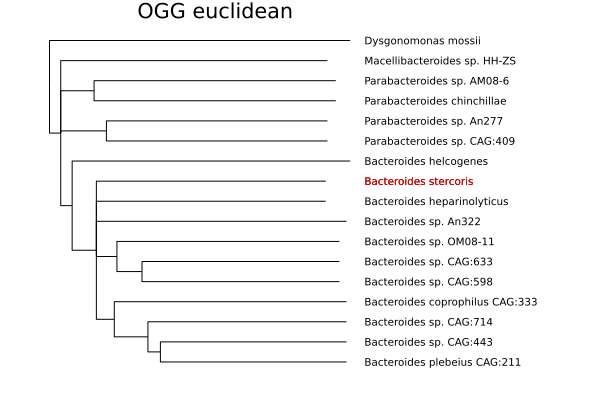

In [96]:
hcat(plotIDS,newnames);
plot(title="OGG euclidean")
plot!(plotting_subtree, treetype=:dendrogram, size = (600, 400), showtips=false, rightmargin=50Plots.Measures.mm)
annotate!(ones(length(plotIDS))*75, 1:length(plotIDS), text.(newnames, :black, :left, 7),)
annotate!(75, 10, text.(newnames[10], :red, :left, 7),) # bacteriodes stercoris
# annotate!(1.7, 18, text.(newnames[18], :red, :left, 7),) # blautia
# annotate!(.95, 1, text.(newnames[1], :red, :left, 7),) # weissella
# annotate!(2.5, 1, text.(newnames[1], :red, :left, 7),) # ecoli
# annotate!(2.7, 8, text.(newnames[8], :red, :left, 7),) # bacteriodes nordii

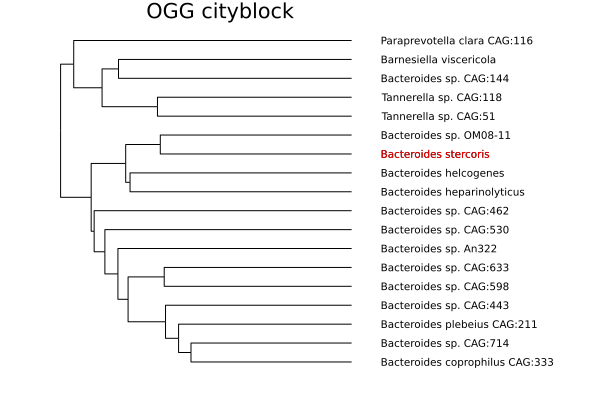

In [111]:
hcat(plotIDS,newnames);
plot(title="OGG cityblock")
plot!(plotting_subtree, treetype=:dendrogram, size = (600, 400), showtips=false, rightmargin=50Plots.Measures.mm)
annotate!(ones(length(plotIDS))*1475, 1:length(plotIDS), text.(newnames, :black, :left, 7),)
annotate!(1475, 12, text.(newnames[12], :red, :left, 7),) # bacteriodes stercoris
# annotate!(1.7, 18, text.(newnames[18], :red, :left, 7),) # blautia
# annotate!(.95, 1, text.(newnames[1], :red, :left, 7),) # weissella
# annotate!(2.5, 1, text.(newnames[1], :red, :left, 7),) # ecoli
# annotate!(2.7, 8, text.(newnames[8], :red, :left, 7),) # bacteriodes nordii

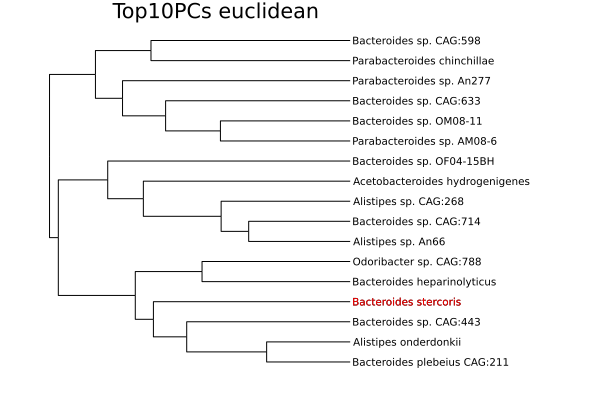

In [128]:
hcat(plotIDS,newnames);
plot(title="Top10PCs euclidean")
plot!(plotting_subtree, treetype=:dendrogram, size = (600, 400), showtips=false, rightmargin=50Plots.Measures.mm)
annotate!(ones(length(plotIDS))*.007, 1:length(plotIDS), text.(newnames, :black, :left, 7),)
annotate!(.007, 4, text.(newnames[4], :red, :left, 7),) # bacteriodes stercoris
# annotate!(1.7, 18, text.(newnames[18], :red, :left, 7),) # blautia
# annotate!(.95, 1, text.(newnames[1], :red, :left, 7),) # weissella
# annotate!(2.5, 1, text.(newnames[1], :red, :left, 7),) # ecoli
# annotate!(2.7, 8, text.(newnames[8], :red, :left, 7),) # bacteriodes nordii

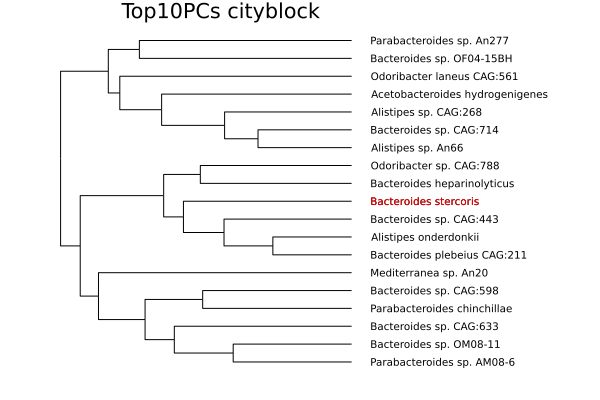

In [141]:
hcat(plotIDS,newnames);
plot(title="Top10PCs cityblock")
plot!(plotting_subtree, treetype=:dendrogram, size = (600, 400), showtips=false, rightmargin=50Plots.Measures.mm)
annotate!(ones(length(plotIDS))*.02, 1:length(plotIDS), text.(newnames, :black, :left, 7),)
annotate!(.02, 10, text.(newnames[10], :red, :left, 7),) # bacteriodes stercoris
# annotate!(1.7, 18, text.(newnames[18], :red, :left, 7),) # blautia
# annotate!(.95, 1, text.(newnames[1], :red, :left, 7),) # weissella
# annotate!(2.5, 1, text.(newnames[1], :red, :left, 7),) # ecoli
# annotate!(2.7, 8, text.(newnames[8], :red, :left, 7),) # bacteriodes nordii